In [7]:
import datetime
import numpy as np
import pandas as pd

import plotly.graph_objects as go
from ipywidgets import widgets

import ipywidgets as widgets
from IPython.display import display, clear_output

import plotly.express as px


# Example from documentation of plotly

In [2]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/yankev/testing/master/datasets/nycflights.csv')
df = df.drop(df.columns[[0]], axis=1)

In [3]:
month = widgets.IntSlider(
    value=1.0,
    min=1.0,
    max=12.0,
    step=1.0,
    description='Month:',
    continuous_update=False
)

use_date = widgets.Checkbox(
    description='Date: ',
    value=True,
)

container = widgets.HBox(children=[use_date, month])

textbox = widgets.Dropdown(
    description='Airline:   ',
    value='DL',
    options=df['carrier'].unique().tolist()
)

origin = widgets.Dropdown(
    options=list(df['origin'].unique()),
    value='LGA',
    description='Origin Airport:',
)


# Assign an empty figure widget with two traces
trace1 = go.Histogram(x=df['arr_delay'], opacity=0.75, name='Arrival Delays')
trace2 = go.Histogram(x=df['dep_delay'], opacity=0.75, name='Departure Delays')
g = go.FigureWidget(data=[trace1, trace2],
                    layout=go.Layout(
                        title=dict(
                            text='NYC FlightDatabase'
                        ),
                        barmode='overlay'
                    ))

In [4]:
def validate():
    if origin.value in df['origin'].unique() and textbox.value in df['carrier'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
        if use_date.value:
            filter_list = [i and j and k for i, j, k in
                           zip(df['month'] == month.value, df['carrier'] == textbox.value,
                               df['origin'] == origin.value)]
            temp_df = df[filter_list]

        else:
            filter_list = [i and j for i, j in
                           zip(df['carrier'] == 'DL', df['origin'] == origin.value)]
            temp_df = df[filter_list]
        x1 = temp_df['arr_delay']
        x2 = temp_df['dep_delay']
        with g.batch_update():
            g.data[0].x = x1
            g.data[1].x = x2
            g.layout.barmode = 'overlay'
            g.layout.xaxis.title = 'Delay in Minutes'
            g.layout.yaxis.title = 'Number of Delays'


origin.observe(response, names="value")
textbox.observe(response, names="value")
month.observe(response, names="value")
use_date.observe(response, names="value")

In [5]:
container2 = widgets.HBox([origin, textbox])
widgets.VBox([container,
              container2,
              g])

In [30]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 1, 5, 4]
}
df = pd.DataFrame(data)

# Create a dropdown widget to select column
dropdown = widgets.Dropdown(
    options=df.columns,
    description='Column:',
    disabled=False,
)

# Function to update plot based on selected column
def update_plot(column):
    fig = px.line(x=df.index, y=df[column], title=f'Plot for {column}')
    fig.show()

# Display the dropdown widget
#display(dropdown)

# Call the update_plot function when the dropdown value changes
widgets.interactive(update_plot, column=dropdown)


interactive(children=(Dropdown(description='Column:', options=('A', 'B', 'C'), value='A'), Output()), _dom_cla…

# Work with data

In [2]:
def get_df_ptak_from_ostoja(nazwa_ptaka, nazwa_ostoi):
    df_ptak = df[(df['nazwa_polska'] == nazwa_ptaka) & (df['dokladnosc_oszac'] == "dokładne liczenie")]
    df_ptak = df_ptak[df['nazwa_ostoi'] == nazwa_ostoi]
    return df_ptak

def get_df_ptak(nazwa_ptaka):
    df_ptak = df[(df['nazwa_polska'] == nazwa_ptaka) & (df['dokladnosc_oszac'] == "dokładne liczenie")]
    return df_ptak

In [3]:
df = pd.read_excel("../przydzielanie kryteriow.xls")

In [4]:
df.keys()

Index(['ptak_nr', 'id', 'kod_ostoi', 'nazwa_ostoi', 'nazwa_polska',
       'nazwa_lacinska', 'status', 'liczba_par_min', 'liczba_par_max',
       'dokladnosc_oszac', 'kryterium', 'rok', 'aktualne'],
      dtype='object')

In [14]:
df_bielik_puszcza_borecka = get_df_ptak_from_ostoja("bielik", "Puszcza Borecka")

C:\Users\pawel.gliwny.FIS\AppData\Local\Temp\ipykernel_10620\123948777.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [15]:
df_bielik = get_df_ptak("bielik")

In [26]:
df_bielik['rok'].unique()

array(['2004-2009', '2005-2007', '2004-2008', '2002-2008', '2005-2009',
       '2007-2008', '2007-2009', '1995-2008', '2008', '1997-2003',
       '1995-2003', '2008-2009', '2009', '1996-2003', '2001-2004, 2008',
       '2001-2004, 2009', '2003-2009', '2006-2009', '2000-2003',
       '2001-2002', '2005-2008', '1999-2003', '2006', '2007', '1998-2009',
       '2003-2007', '2004-2005', '2002-2009', '2006-2007', '2000-2009',
       '2004-2006'], dtype=object)

In [24]:
data = df_bielik[df_bielik['rok'] == '2004-2009']
data_sorted = data.sort_values(by='liczba_par_min', ascending=False)

In [20]:
data.head()

,ptak_nr,id,kod_ostoi,nazwa_ostoi,nazwa_polska,nazwa_lacinska,status,liczba_par_min,liczba_par_max,dokladnosc_oszac,kryterium,rok,aktualne
81,71.0,12231,PL001,Delta Świny,bielik,Haliaeetus albicilla,L,9.0,13.0,dokładne liczenie,NaN,2004-2009,tak
581,71.0,9120,PL007,Ostoja Miedwie,bielik,Haliaeetus albicilla,Z,10.0,10.0,dokładne liczenie,NaN,2004-2009,tak
665,71.0,10498,PL008,Ostoja Cedyńska,bielik,Haliaeetus albicilla,L,4.0,6.0,dokładne liczenie,NaN,2004-2009,tak
805,71.0,8749,PL010,Bagna Rozwarowskie,bielik,Haliaeetus albicilla,Z,1.0,15.0,dokładne liczenie,NaN,2004-2009,tak
1112,71.0,10537,PL016,Ostoja Drawska,bielik,Haliaeetus albicilla,L,14.0,18.0,dokładne liczenie,NaN,2004-2009,tak


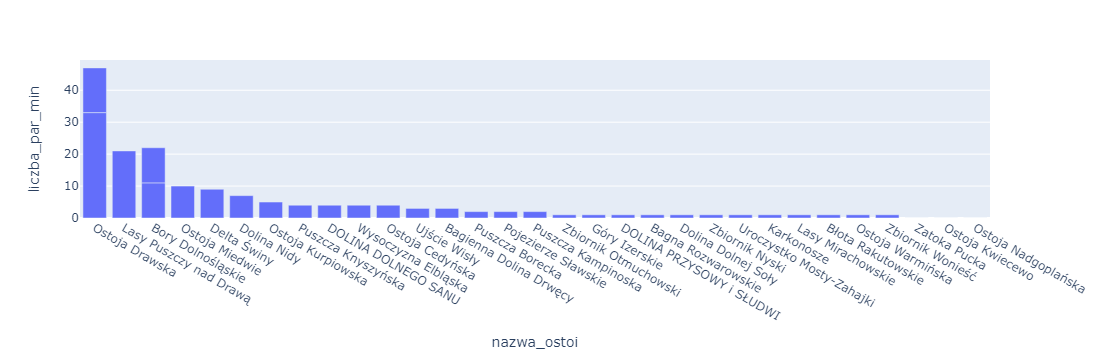

In [25]:
fig = px.bar(data_sorted, x='nazwa_ostoi', y='liczba_par_min')
fig.show()

In [27]:
def view_ptak(rok):
    display(df_bielik[df_bielik['rok'] == rok])

rokSelect = widgets.Select(options=['1995-1997', '1997-1999', '2004-2009'])
widgets.interactive(view_ptak, rok=rokSelect)

interactive(children=(Select(description='rok', options=('1995-1997', '1997-1999', '2004-2009'), value='1995-1…

## Przyklad z widget

In [5]:
data = {
    'ptak_nr': [101, 102, 103, 104],
    'id': [1, 2, 3, 4],
    'kod_ostoi': ['O001', 'O002', 'O003', 'O004'],
    'nazwa_ostoi': ['Ostoja A', 'Ostoja B', 'Ostoja C', 'Ostoja D'],
    'nazwa_polska': ['Sikora', 'Jaskółka', 'Wróbel', 'Kruk'],
    'nazwa_lacinska': ['Parus', 'Hirundo', 'Passer', 'Corvus'],
    'status': ['chroniony', 'niechroniony', 'chroniony', 'chroniony'],
    'liczba_par_min': [50, 100, 150, 200],
    'liczba_par_max': [55, 150, 200, 250],
    'dokladnosc_oszac': ['wysoka', 'średnia', 'niska', 'wysoka'],
    'kryterium': ['I', 'II', 'III', 'IV'],
    'rok': [2021, 2020, 2020, 2021],
    'aktualne': [True, True, True, True]
}

df = pd.DataFrame(data)



In [8]:
# Widgety wyboru:
nazwa_ostoi_widget = widgets.Dropdown(options=['Wszystkie'] + list(df['nazwa_ostoi'].unique()), description='Nazwa ostoi:')
nazwa_polska_widget = widgets.Dropdown(options=['Wszystkie'] + list(df['nazwa_polska'].unique()), description='Nazwa polska:')
rok_widget = widgets.Dropdown(options=['Wszystkie'] + list(df['rok'].unique()), description='Rok:')

output = widgets.Output()

def filter_data(change):
    with output:
        clear_output(wait=True)  # Czyści poprzednie wyniki
        current_ostoi = nazwa_ostoi_widget.value
        current_polska = nazwa_polska_widget.value
        current_rok = rok_widget.value

        # Filtrowanie danych
        filtered_data = df.copy()
        if current_ostoi != 'Wszystkie':
            filtered_data = filtered_data[filtered_data['nazwa_ostoi'] == current_ostoi]
        if current_polska != 'Wszystkie':
            filtered_data = filtered_data[filtered_data['nazwa_polska'] == current_polska]
        if current_rok != 'Wszystkie':
            filtered_data = filtered_data[filtered_data['rok'] == current_rok]

        # Wyświetlanie danych
        display(filtered_data)

# Nasłuchiwanie na zmiany wartości w widgetach:
nazwa_ostoi_widget.observe(filter_data, names='value')
nazwa_polska_widget.observe(filter_data, names='value')
rok_widget.observe(filter_data, names='value')

# Wyświetlanie widgetów:
display(nazwa_ostoi_widget, nazwa_polska_widget, rok_widget, output)

Dropdown(description='Nazwa ostoi:', options=('Wszystkie', 'Ostoja A', 'Ostoja B', 'Ostoja C', 'Ostoja D'), va…

Dropdown(description='Nazwa polska:', options=('Wszystkie', 'Sikora', 'Jaskółka', 'Wróbel', 'Kruk'), value='Ws…

Dropdown(description='Rok:', options=('Wszystkie', 2021, 2020), value='Wszystkie')

Output()